# Richardson Lucy Visualization

This notebook was created to visualize the experiments conducted for Richardson Lucy deconvolution.

In [1]:
import astropy
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import Gaussian2DKernel, convolve
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
# 唯一修改处：
change = '10_0015' # choose between 4_001, 10_001, 10_0015



# se_hr_dir = "../../nicmos_se_hr_"+change
# se_lr_dir = "../../nicmos_se_lr_"+change
# os.makedirs(se_hr_dir, exist_ok=True)
# os.makedirs(se_lr_dir, exist_ok=True)

In [12]:
df_psnr = pd.read_csv('result_data/rl_psnr_'+change+'.csv').iloc[:, -2: ]
df_ssim = pd.read_csv('result_data/rl_ssim_'+change+'.csv').iloc[:, -2: ]
df_sssim = pd.read_csv('result_data/rl_sssim_'+change+'.csv').iloc[:, -2: ]

In [6]:
# df_ssim

In [7]:
# df_sssim.shape[0]

In [8]:
# print(df_sssim['epoch_no'].mean())
# print(df_ssim['epoch_no'].mean())
# print(df_psnr['epoch_no'].mean())

In [ ]:
# df_ssim = df_ssim.iloc[:,1:-9]
# df_sssim = df_sssim.iloc[:,1:-9]
# df_psnr = df_psnr.iloc[:,1:-9]

In [ ]:
# best_epochs = df_sssim.idxmax(axis=0) # best epochs is based on sssim
# print(best_epochs.iloc[:])
# print(np.mean(best_epochs))

In [ ]:
# best_epochs.to_csv('best_epochs_rl.csv', sep=',', index=False)

In [ ]:
# best_ssim = []
# best_sssim = []
# best_psnr = []
# for i in range(df_sssim.shape[1]):
#     best_ssim.append(df_ssim.iloc[best_epochs[i], i])
#     best_sssim.append(df_sssim.iloc[best_epochs[i], i])
#     best_psnr.append(df_psnr.iloc[best_epochs[i], i])

In [ ]:
# psnr_mean = np.array(best_psnr).mean()
# psnr_std = np.array(best_psnr).std()

# ssim_mean = np.array(best_ssim).mean()
# ssim_std = np.array(best_ssim).std()

# sssim_mean = np.array(best_sssim).mean()
# sssim_std = np.array(best_sssim).std()

In [11]:
# print(psnr_mean, psnr_std)
# print(ssim_mean, ssim_std)
# print(sssim_mean, sssim_std)

In [9]:
# print(df_sssim['best_score'].mean())
# print(df_sssim['best_score'].std())

In [10]:
# print(df_ssim['best_score'].mean())
# print(df_ssim['best_score'].std())

In [12]:
# print(df_psnr['best_score'].mean())
# print(df_psnr['best_score'].std())

In [ ]:
# ssim_vals = df_ssim['best_score'].values
# ssim_vals

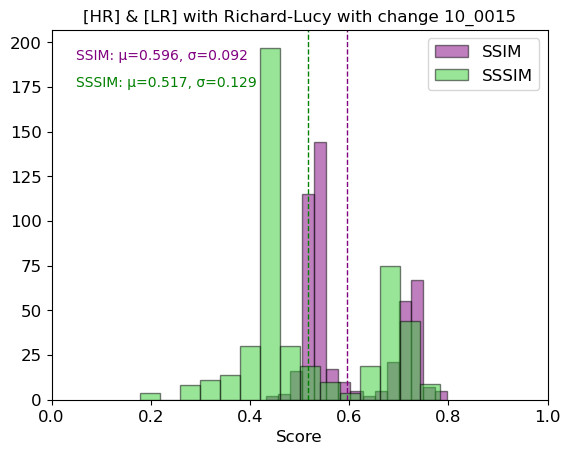

In [15]:
ssim_vals = df_ssim['best_score'].values
sssim_vals = df_sssim['best_score'].values

ssim_mean = np.mean(ssim_vals)
ssim_std = np.std(ssim_vals)
sssim_mean = np.mean(sssim_vals)
sssim_std = np.std(sssim_vals)

plt.figure()
plt.hist(ssim_vals, bins=15, alpha=0.5, color='purple', edgecolor='black', label='SSIM')
plt.hist(sssim_vals, bins=15, alpha=0.5, color='limegreen', edgecolor='black', label='SSSIM')

# 添加均值、方差文本
plt.text(0.05, 190, f'SSIM: μ={ssim_mean:.3f}, σ={ssim_std:.3f}', fontsize=10, color='purple')
plt.text(0.05, 175, f'SSSIM: μ={sssim_mean:.3f}, σ={sssim_std:.3f}', fontsize=10, color='green')

# 可选：标出均值所在位置的竖线
plt.axvline(ssim_mean, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(sssim_mean, color='green', linestyle='dashed', linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Score', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmin=0, xmax=1)
plt.title("[HR] & [LR] with Richard-Lucy with change "+change)
plt.savefig("result_plot/rl_ssim_"+change+".png")

In [13]:
# plt.figure()
# plt.hist(best_psnr, bins=10, alpha=0.5, color='purple', edgecolor='black', label='PSNR')
# #plt.title("Histogram of SSIM and Selective SSIM index values ")
# plt.legend(fontsize=12)
# plt.xlabel('Score', fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.xlim(xmin=0)
# plt.savefig("rl_psnr_results.png")

In [16]:
# plt.figure()
# plt.hist(best_psnr, bins=10, alpha=0.5, color='purple', edgecolor='black', label='PSNR')
# #plt.title("Histogram of SSIM and Selective SSIM index values ")
# plt.legend(fontsize=12)
# plt.xlabel('Score', fontsize=12)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.xlim(xmin=0)
# plt.savefig("rl_psnr_results_10_0015.png")